In [165]:
from langchain_core.tools import tool
@tool
def multiply(a:int,b:int)->int:
    """Multiply"""
    return a*b
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [166]:
!pip show langchain

Name: langchain
Version: 0.3.7
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: D:\breakout-ai\breakoutenvironmen\Lib\site-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


In [167]:
import langchain

##### This @tool decorator is the simplest way to define a custom tool. The decorator uses the function name as the tool name by default, but this can be overridden by passing a string as the first argument. This @tool decorator is the simplest way to define a custom tool. The decorator uses the function name as the tool name by default, but this can be overridden by passing a string as the first argument. 

In [168]:
# as a param to tool (input schema), one can also add annotations, nested schems and  other features too
from typing import Annotated,List
@tool
def multiply_by_max(
    a: Annotated[str, "scale factor"],
    b: Annotated[List[int], "list of ints over which to take maximum"],
) -> int:
    """Multiply a by the maximum of b."""
    return a * max(b)

In [169]:
print(multiply_by_max.name)

multiply_by_max


In [170]:
print(multiply_by_max.description)
# print(multiply.args)

Multiply a by the maximum of b.


In [171]:
print(multiply_by_max.args)

{'a': {'description': 'scale factor', 'title': 'A', 'type': 'string'}, 'b': {'description': 'list of ints over which to take maximum', 'items': {'type': 'integer'}, 'title': 'B', 'type': 'array'}}


In [172]:
# as such aap input m ek json schema ya [pydantic ] bhi de skte ho
from pydantic import BaseModel, Field


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")

# by default tool ka naam whi hota 
# jo function ka naam hai jiske upar @ decorator lga hai
# otherwise khud se spcify name like here I did 
@tool("multiplication-tool", args_schema=CalculatorInput, return_direct=True)
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


# Let's inspect some of the attributes associated with the tool.
print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.return_direct)

multiplication-tool
Multiply two numbers.
{'a': {'description': 'first number', 'title': 'A', 'type': 'integer'}, 'b': {'description': 'second number', 'title': 'B', 'type': 'integer'}}
True


In [173]:
from langchain_core.tools import StructuredTool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


async def amultiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


calculator = StructuredTool.from_function(func=multiply, coroutine=amultiply)

print(calculator.invoke({"a": 2, "b": 3}))
print(await calculator.ainvoke({"a": 2, "b": 5}))


6
10


In [174]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq

load_dotenv()


True

In [175]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
api_wrapper=WikipediaAPIWrapper()
tool=WikipediaQueryRun(api_wrapper=api_wrapper)
print(tool.run({"query":"langchain"}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.

Page: Retrieval-augmented generation
Summary: Retrieval Augmented Generation (RAG) is a technique that grants generative artificial intelligence models information retrieval capabilities. It modifies interactions with a large language model (LLM) so that the model responds to user queries with reference to a specified set of documents, using this information to augment information drawn from its own vast, static training data. This allows LLMs to use domain-specific and/or updated information.  
Use cases include providing chatbot access to internal company data or giving factual information only from an authoritative source.



Page: Sentence 

In [176]:
from langchain_google_genai import ChatGoogleGenerativeAI


ModuleNotFoundError: No module named 'langchain_google_genai'

In [ ]:
llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest",temperature=0.2)

In [ ]:
llm=ChatGroq(model="llama-3.1-8b-instant",temperature=0.2)

In [ ]:
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent
tool=load_tools(["wikipedia"],llm=llm)

In [ ]:
agent=initialize_agent(tool,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)

In [ ]:
agent.run("what is llama and who create this llm model?")

C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_4108\1212027048.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("what is llama and who create this llm model?")




> Entering new AgentExecutor chain...
Thought: I need to find information about the LLM model and its creator.
Action: wikipedia
Action Input: Llama (artificial intelligence)
Observation: Page: Generative artificial intelligence
Summary: Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models often generate output in response to specific prompts. Generative AI systems learn the underlying patterns and structures of their training data, enabling them to create new data. 
Improvements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini, and LLaMA; text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney, and DALL-E; and text-to-video AI generators 

'Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023.'

In [ ]:
# the above thing works good,
# as the mentioned says it will search inside wikipedia for this informati

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
search = TavilySearchResults()

In [ ]:
search.invoke("what is the weather in SF")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1731848824, 'localtime': '2024-11-17 05:07'}, 'current': {'last_updated_epoch': 1731848400, 'last_updated': '2024-11-17 05:00', 'temp_c': 8.3, 'temp_f': 46.9, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 3.1, 'wind_kph': 5.0, 'wind_degree': 124, 'wind_dir': 'SE', 'pressure_mb': 1019.0, 'pressure_in': 30.08, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 80, 'cloud': 0, 'feelslike_c': 7.8, 'feelslike_f': 46.1, 'windchill_c': 12.0, 'windchill_f': 53.6, 'heatindex_c': 11.8, 'heatindex_f': 53.2, 'dewpoint_c': 8.4, 'dewpoint_f': 47.1, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 5.0, 'gust_kph': 8.0}}"},
 {'url': 'https://www.timeanddate.com/weather/usa/san-

In [ ]:
tools=[search]


In [ ]:
from langchain.agents import create_tool_calling_agent
from langchain import hub

In [ ]:
prompt=hub.pull("hwchase17/openai-functions-agent")

In [ ]:
print(prompt)

input_variables=['agent_scratchpad', 'input'] optional_variables=['chat_history'] input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')]

In [ ]:
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

agent_scratchpad: The agent does not call a tool just once to get the desired answer, but has a structure that calls tools repeatedly until the desired answer is obtained. Each time you call a tool, what the previous call was like, information about the previous call, and the result are stored in this field.

In [ ]:
from langchain.agents import create_tool_calling_agent
agent = create_tool_calling_agent(llm, tools, prompt)

In [ ]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
load_dotenv()

True

In [ ]:
import os 
os.environ['SERPAPI_API_KEY']='827e4b48bb21e27f38b14f48cc2b0f266aebaff8d3861fb0b65b800d1d5850d9'

In [ ]:
os.environ['SERPAPI_API_KEY']

'827e4b48bb21e27f38b14f48cc2b0f266aebaff8d3861fb0b65b800d1d5850d9'

In [ ]:
agent_executor.invoke({"input": "What is the mail address through which I can complaint Zomato for bad food quality? "})



> Entering new AgentExecutor chain...

Invoking: `Search` with `Zomato customer complaint email address`


["Issue with your live order? Click on the 'Support' or 'Online ordering help' section in your app to connect to our customer support team.", "Reach out to us by emailing at companysecretary@zomato.com, and we'll get back to you. Contact Us. Disclosures under Regulation 46 of the LODR.", 'Please email legal@zomato.com if you witness any behavior not in compliance with this code as it is in direct violation of employee contracts. Next. Privacy ...', 'For any concern / complaint relating to your order, please reach out to our customer care team using the chat option. ... Continue with Email. Sign in with ...', 'Find the contact details including Zomato Complaints email & phone number with Resolver.', 'The best email to contact Zomato is order@zomato.com. 32% of customers use this email address to address their issues and concerns.', 'Tell us what you think about Zomato. Name Email

{'input': 'What is the mail address through which I can complaint Zomato for bad food quality? ',
 'output': 'You can email Zomato at companysecretary@zomato.com or order@zomato.com for complaints related to bad food quality. You can also contact their customer care team using the chat option or call their customer service number (910 511 1010) for assistance.'}

In [ ]:
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import load_tools
tools = load_tools(["serpapi"], serpapi_api_key='827e4b48bb21e27f38b14f48cc2b0f266aebaff8d3861fb0b65b800d1d5850d9')


No good search result found


In [ ]:
agent_executor.invoke({"input": "whats the weather in sf?"})



> Entering new AgentExecutor chain...
I am sorry, I cannot fulfill this request. The available tools lack the desired functionality.

> Finished chain.


{'input': 'whats the weather in sf?',
 'output': 'I am sorry, I cannot fulfill this request. The available tools lack the desired functionality.'}

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
loader = ader("https://docs.smith.langchain.com/overview")
docs = loader.load()WebBaseLo

In [ ]:
docs

[Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': "LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain's open source frameworks is not necessary - LangSmith works on its own!", 'language': 'en'}, page_content='\n\n\n\n\nGet started with LangSmith | 🦜️🛠️ LangSmith\n\n\n\n\n\n\nSkip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick StartObservabilityEvaluationPrompt EngineeringDeployment (LangGraph Cloud)AdministrationSelf-hostingReferenceQuick StartOn this pageGet started with LangSmith\nLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain\'s open source frameworks is not necessary - LangSmith wor

In [ ]:
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
).split_documents(docs)

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [ ]:
vector = FAISS.from_documents(documents,embeddings)
retriever = vector.as_retriever()

In [ ]:
retriever.invoke("Langsmith dataset upload")

[Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': "LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain's open source frameworks is not necessary - LangSmith works on its own!", 'language': 'en'}, page_content='Get started with LangSmith | 🦜️🛠️ LangSmith'),
 Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': "LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain's open source frameworks is not necessary - LangSmith works on its own!", 'language': 'en'}, page_content="4. Log your first trace\u200b\nLangSmith + LangCh

In [ ]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
)

In [ ]:
tools = [search, retriever_tool]

In [ ]:
tools

[TavilySearchResults(api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'))),
 Tool(name='langsmith_search', description='Search for information about LangSmith. For any questions about LangSmith, you must use this tool!', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002C9A0016DE0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002C9B16B5C10>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002C9A03CD440>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002C9B16B5C10>, search_kwargs={}), d

In [ ]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
agent_executor.invoke({"input": "hi! what is langsmith?"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'what is langsmith'}`


Get started with LangSmith | 🦜️🛠️ LangSmith

4. Log your first trace​
LangSmith + LangChain OSSYou don't need to use the LangSmith SDK directly if your application is built on LangChain/LangGraph (either Python and JS).See the how-to guide for tracing with LangChain here.
We provide multiple ways to log traces to LangSmith. Below, we'll highlight
how to use traceable(). See more on the Annotate code for tracing page.

Click the link printed out by your evaluation run to access the LangSmith experiments UI,
and explore the results of your evaluation.
Learn more about evaluation in the tutorials, conceptual guide, and how-to guides.
Was this page helpful?You can leave detailed feedback on GitHub.NextConcepts1. Install LangSmith2. Create an API key3. Set up your environment4. Log your first trace5. Run your first evaluationCommunityDiscordTwitterGitHubDocs CodeLangSmith SDKPythonJ

{'input': 'hi! what is langsmith?',
 'output': 'Based on the search results, LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. LangSmith provides a comprehensive set of tools for prompt engineering, performance monitoring, and output evaluation, making it indispensable for developing high-quality LLM-based solutions. It also offers a unified DevOps platform for developing, collaborating, testing, deploying, and monitoring LLM applications.'}

In [ ]:
from langchain_community.utilities import GoogleSerperAPIWrapper
from langchain_core.prompts import PromptTemplate
from langchain.agents import AgentExecutor,create_react_agent

In [ ]:
os.environ['SERPER_API_KEY']='b5ada68eefdb0ba04d6af76b95e1e7e677c4f8c9'
from langchain.agents import Tool

In [ ]:
google_search=GoogleSerperAPIWrapper()
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search"
    )
]


In [ ]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [ ]:
prompt = PromptTemplate.from_template(template)

In [ ]:
search_agent = create_react_agent(llm,tools,prompt)

In [ ]:
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

In [ ]:
agent_executor.invoke({"input": "Where is the hometown of the 2007 US PGA championship winner and his score?"})



> Entering new AgentExecutor chain...
Question: Where is the hometown of the 2007 US PGA championship winner and his score?
Thought: To find the answer, I need to know who the winner of the 2007 US PGA championship was and what his score was.
Action: Use the Intermediate Answer tool to search for the winner of the 2007 US PGA championship.
Action Input: tool_input = "2007 US PGA championship winner", verbose = FalseUse the Intermediate Answer tool to search for the winner of the 2007 US PGA championship. is not a valid tool, try one of [Intermediate Answer].Question: Where is the hometown of the 2007 US PGA championship winner and his score?
Thought: To find the answer, I need to know who the winner of the 2007 US PGA championship was and what his score was.
Action: Use the Intermediate Answer tool to search for the winner of the 2007 US PGA championship.
Action Input: tool_input = "2007 US PGA championship winner", verbose = FalseUse the Intermediate Answer tool to search for the wi

KeyboardInterrupt: 

In [ ]:
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="Searches Google to answer queries."
    )
]

template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

prompt = PromptTemplate.from_template(template)

search_agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

agent_executor.invoke({"input": "What is support email id of Zomato ? "})




> Entering new AgentExecutor chain...
Question: What is support email id of Zomato ?
Thought: To find the support email id of Zomato, I can use the Google search tool to look up the information.
Action: Intermediate Answer
Action Input: 'What is the support email id of Zomato?'[{'url': 'https://flipshope.com/blog/zomato-customer-care/', 'content': 'Zomato Customer Care Email Id Zomato Customer Care Numbers, Email-Id’s & Support City Wise! Check out Zomato customer care number, Email IDs and addresses! Zomato Customer Care Number And Emails Zomato Customer Care Email-Id: help@zomato.com Zomato customer care number toll-free: +91 226 232 7777 How to Contact Zomato Customer Care & Support You can contact the Zomato customer care helpline number and support. Here are the steps for contacting the Zomato customer care helpline number : Ans. Zomato Customer care number is +91 226 232 7777 If you like this article (Zomato Customer Care Numbers, Email-Id & Support City Wise!), share your revi

{'input': 'What is support email id of Zomato ? ',
 'output': 'The support email id of Zomato is help@zomato.com.',
 'intermediate_steps': [(AgentAction(tool='Intermediate Answer', tool_input="'What is the support email id of Zomato?'", log="Question: What is support email id of Zomato ?\nThought: To find the support email id of Zomato, I can use the Google search tool to look up the information.\nAction: Intermediate Answer\nAction Input: 'What is the support email id of Zomato?'"),
   [{'url': 'https://flipshope.com/blog/zomato-customer-care/',
     'content': 'Zomato Customer Care Email Id Zomato Customer Care Numbers, Email-Id’s & Support City Wise! Check out Zomato customer care number, Email IDs and addresses! Zomato Customer Care Number And Emails Zomato Customer Care Email-Id: help@zomato.com Zomato customer care number toll-free: +91 226 232 7777 How to Contact Zomato Customer Care & Support You can contact the Zomato customer care helpline number and support. Here are the ste

In [ ]:
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="Searches Google to answer queries."
    )
]

template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

prompt = PromptTemplate.from_template(template)

search_agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

agent_executor.invoke({"input": "Zomato customer complaint email address ?"})




> Entering new AgentExecutor chain...
Question: Zomato customer complaint email address ?
Thought: I need to search for Zomato's customer complaint email address.
Action: Intermediate Answer
Action Input: 'Zomato customer complaint email address'[{'url': 'https://www.reddit.com/r/LegalAdviceIndia/comments/1bwv3qy/advice_for_a_filing_a_case_against_zomato_in/', 'content': 'You can also call the consumer helpline at 1800-11-4000 or 1915 for assistance. To file a complaint against Zomato, you can follow these steps: Contact Zomato Customer Support: (0824-0693-199) Visit the Swiggy website or open the Zomato app on your mobile device. Look for the "Help" or "Support" section.'}, {'url': 'https://www.grievanceofficer.com/grievance-officer-zomato/', 'content': 'Grievance Officer at Zomato - Grievance Officer Grievance Officer Grievance Officers You are here: Home / Grievance Officer at Zomato Grievance Officer at Zomato Grievance Redressal Officer Email address: legal@zomato.com Grievance 

{'input': 'Zomato customer complaint email address ?',
 'output': 'grievance@zomato.com',
 'intermediate_steps': [(AgentAction(tool='Intermediate Answer', tool_input="'Zomato customer complaint email address'", log="Question: Zomato customer complaint email address ?\nThought: I need to search for Zomato's customer complaint email address.\nAction: Intermediate Answer\nAction Input: 'Zomato customer complaint email address'"),
   [{'url': 'https://www.reddit.com/r/LegalAdviceIndia/comments/1bwv3qy/advice_for_a_filing_a_case_against_zomato_in/',
     'content': 'You can also call the consumer helpline at 1800-11-4000 or 1915 for assistance. To file a complaint against Zomato, you can follow these steps: Contact Zomato Customer Support: (0824-0693-199) Visit the Swiggy website or open the Zomato app on your mobile device. Look for the "Help" or "Support" section.'},
    {'url': 'https://www.grievanceofficer.com/grievance-officer-zomato/',
     'content': 'Grievance Officer at Zomato - Gr

#### React agent with custom tools

In [ ]:
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

In [ ]:
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

In [ ]:
prompt = hub.pull("hwchase17/react")
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [ ]:
prompt="""
Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: think about the required steps to answer the question
Action: take the necessary action, selecting from [{tool_names}]
Action Input: input required for the action
Observation: the result of the action
... (repeat Thought/Action/Action Input/Observation as needed)
Thought: I now have all the information needed
Final Answer: the final answer to the original input question

Important: Do not repeat the same action indefinitely. If a tool does not return useful information, consider an alternative explanation.

Begin!

Question: {input}
Thought:{agent_scratchpad}

"""

In [ ]:
tools = [get_employee_salary, get_employee_id]

In [ ]:
agent = create_react_agent(llm,tools,prompt)

In [ ]:
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [ ]:
agent_executor.invoke({"input":"What is the Salary of Evan?"})



> Entering new AgentExecutor chain...
Thought: To find the salary of Evan, I need to know his employee ID first.
Action: get_employee_id
Action Input: EvanE005Question: What is the Salary of Evan?
Thought: To find the salary of Evan, I need to know his employee ID first.
Action: get_employee_id
Action Input: EvanE005Question: What is the Salary of Evan?
Thought: To find the salary of Evan, I need to know his employee ID first.
Action: get_employee_id
Action Input: EvanE005Question: What is the Salary of Evan?
Thought: To find the salary of Evan, I need to know his employee ID first.
Action: get_employee_id
Action Input: EvanE005Question: What is the Salary of Evan?
Thought: To find the salary of Evan, I need to know his employee ID first.
Action: get_employee_id
Action Input: EvanE005Question: What is the Salary of Evan?
Thought: To find the salary of Evan, I need to know his employee ID first.
Action: get_employee_id
Action Input: EvanE005Question: What is the Salary of Evan?
Though

{'input': 'What is the Salary of Evan?',
 'output': 'Agent stopped due to iteration limit or time limit.'}

In [ ]:
tools = [get_employee_id, get_employee_salary]

agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

response = agent_executor.invoke({"input": "What is the Salary of Evan?"})
print(response)


AttributeError: 'str' object has no attribute 'input_variables'

In [ ]:
llm=ChatGroq(model='llama-3.1-70b-versatile',temperature=0.2)

In [ ]:
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  Output: It outputs employee id of the employee if present, else outputs Employee not found
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

In [ ]:
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

In [ ]:
llm=ChatGroq(model_name="llama-3.1-70b-versatile",temperature=0.2)

In [ ]:

tools = [get_employee_salary, get_employee_id]

In [ ]:
agent = create_react_agent(llm,tools,prompt)

In [ ]:
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [ ]:
agent_executor.invoke({"input":"What is the Salary of George?"})



> Entering new AgentExecutor chain...
Thought: To find the salary of George, I need to first find his employee ID.

Action: get_employee_id
Action Input: GeorgeE007Thought: Now that I have George's employee ID, I can use it to find his salary.

Action: get_employee_salary
Action Input: E00749000Thought: I now know the final answer
Final Answer: 49000

> Finished chain.


{'input': 'What is the Salary of George?', 'output': '49000'}

### REact agent
ReAct Agent (Reasoning + Acting):
Definition:

The ReAct framework combines reasoning and acting in a single loop to handle tasks. The agent uses natural language reasoning (thinking through steps) and task actions (performing tasks like calculations or data retrieval).

The agent uses a combination of reasoning steps to guide actions in real-time, using feedback from those actions to further inform the next step in reasoning.

How it works:

Step 1: The agent receives a question or task.
Step 2: It reasons aloud (in natural language) about how to solve it.
Step 3: Based on its reasoning, it takes actions (e.g., searching a database, calculating something).
Step 4: The results of these actions are integrated into its reasoning and may trigger further actions.
Step 5: It repeats the process until it arrives at a solution.
Key points:

Combines thinking and doing (reasoning and actions).
Performs iterative steps, updating its process based on action results.
Typically handles complex decision-making scenarios.
Example:

Original task: “Calculate the total number of apples in a basket if there are 4 baskets and 7 apples in each.”
Reasoning: "I need to multiply 4 by 7 to get the total number of apples."
Action: Perform the multiplication.
Result: "There are 28 apples."
Reasoning: "I am done."

Self-Ask with Search Agent:
Definition:

This approach allows the AI to ask itself follow-up questions when it doesn't immediately know the answer. It performs a recursive questioning process to break down complex queries into smaller, more manageable ones.
Once the AI generates these follow-up questions, it performs an external search (e.g., through Google or an internal database) to gather the necessary information before formulating a response.
How it works:

Step 1: Receive a complex question.
Step 2: The agent identifies sub-questions or follow-up questions.
Step 3: It performs a search or fetches answers to these questions from external resources (like a web search).
Step 4: The answers are aggregated to provide a complete response.
Key points:

Emphasizes question decomposition.
Relies on external search for sub-questions.
Useful for answering open-ended or broad questions where the answer is not immediately available.
Example:

Original question: “How many moons does Jupiter have?”
Sub-question: “What is Jupiter?” (search)
Sub-question: “What are moons?” (search)
Finally, it retrieves the answer: "Jupiter has 79 moons."

In [181]:
os.getcwd()

'd:\\breakout-ai\\notebooks'

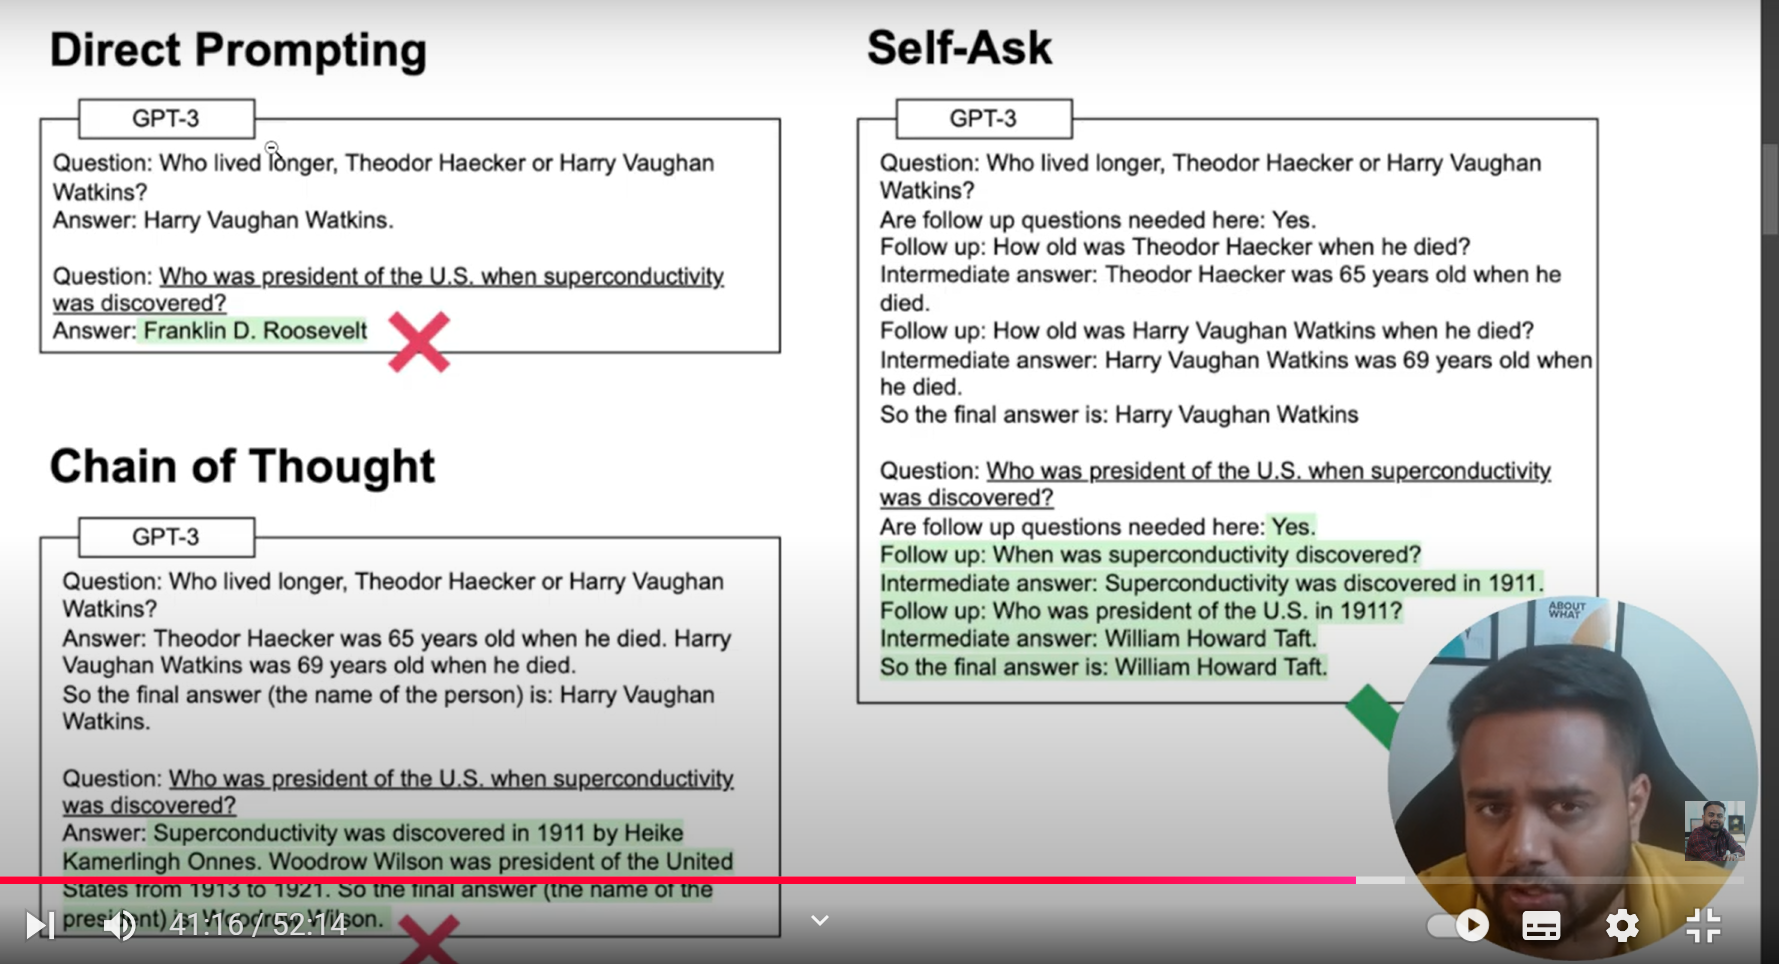

In [182]:
from IPython.display import Image
display(Image('ok.png'))


In [ ]:
# Direct prompting Direct puchna llm se
# Chain of thouht sochna then answer
# self ask: Follow up generate krta then intermediate answers krta
# dobara follow up dobara wo etc

In [184]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings=GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm=ChatGoogleGenerativeAI(model="gemini-1.0-pro")


In [185]:
from langchain import hub
from langchain.agents import AgentExecutor,create_self_ask_with_search_agent
from langchain_community.tools.tavily_search import TavilyAnswer


In [186]:
tools=[
    Tool(
        name="Intermediate Answer",
        func=google_search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [188]:
prompt=hub.pull("hwchase17/self-ask-with-search")

In [190]:
print(prompt)

input_variables=['agent_scratchpad', 'input'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'self-ask-with-search', 'lc_hub_commit_hash': '9ef33d1fc82608bdfaa88b3757306ec4f22511b736cb267b1737616641dac0cc'} template='Question: Who lived longer, Muhammad Ali or Alan Turing?\nAre follow up questions needed here: Yes.\nFollow up: How old was Muhammad Ali when he died?\nIntermediate answer: Muhammad Ali was 74 years old when he died.\nFollow up: How old was Alan Turing when he died?\nIntermediate answer: Alan Turing was 41 years old when he died.\nSo the final answer is: Muhammad Ali\n\nQuestion: When was the founder of craigslist born?\nAre follow up questions needed here: Yes.\nFollow up: Who was the founder of craigslist?\nIntermediate answer: Craigslist was founded by Craig Newmark.\nFollow up: When was Craig Newmark born?\nIntermediate answer: Craig Newmark was born on December 6, 1952.\nSo the final answer is: December 6, 1952\n\nQuestion: W

In [191]:
print(prompt.template)

Question: Who lived longer, Muhammad Ali or Alan Turing?
Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali

Question: When was the founder of craigslist born?
Are follow up questions needed here: Yes.
Follow up: Who was the founder of craigslist?
Intermediate answer: Craigslist was founded by Craig Newmark.
Follow up: When was Craig Newmark born?
Intermediate answer: Craig Newmark was born on December 6, 1952.
So the final answer is: December 6, 1952

Question: Who was the maternal grandfather of George Washington?
Are follow up questions needed here: Yes.
Follow up: Who was the mother of George Washington?
Intermediate answer: The mother of George Washington was Mary Ball Washington.
Follow up: Who was the father of Mary Ball Washin

In [194]:
agent=create_self_ask_with_search_agent(llm,tools,prompt)

In [195]:
# construction of self ask withs earch 
agent_executor=AgentExecutor(
    agent=agent,tools=tools,verbose=True,handle_parsing_errors=True
)

In [196]:
agent_executor.invoke(
    {"input":"Where is a hometown of the current prime minister of India?"}
)



> Entering new AgentExecutor chain...
Yes.
Follow up: Who is the current Prime Minister of India?Narendra ModiFollow up: Where is the hometown of Narendra Modi?Modi was born and raised in Vadnagar in northeastern Gujarat, where he completed his secondary education. He was introduced to the RSS at the age of eight. Narendra Modi (born September 17, 1950, Vadnagar, India) is an Indian politician and government official who rose to become a senior leader ... Narendra Modi's inspiring life journey to the Office of Prime Minister began in the by-lanes of Vadnagar, a small town in North Gujarat's Mehsana district. He ... Place of Birth. Vadnagar, Mahesana, (Gujarat) ; Date of Birth. 17-Sep-1950. Nowhere is this more apparent than in Vadnagar, the Indian prime minister's hometown in the western state of Gujarat. Early life. Narendra Modi was born into a Gujarati family in Vadnagar. As a child, he used to help his father, who ran a tea stall at Vadnagar railway station. ... Vadnagar, a quain

{'input': 'Where is a hometown of the current prime minister of India?',
 'output': 'Vadnagar'}